# K-means Clustering
**K**: number of clusters to segment data into

**algorithm**: Iterative procedure
- Assign K number of random "centers" -- *np.random.choice(X, size=K)*
- Iteratively for every other sample calculate the closest distance to the centers and group together
- Repeat until clusters no longer move and have converged



**K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable**


**Because K-Means is conservative between iterations, initial centroids and how we assign the players to clusters initially matters a lot**

## Data Cleaning

In [20]:
import pandas as pd
column_name= ['first name','last name','team','pos','age','gp','mpg','min%','usg%','tor','fta',
              'ft','2pa','2p%','3pa','3p%','ts%','ppg','rpg','trb%','apg','ast%','spg','bpg','vi']
nba = pd.read_table('nba.txt', names=column_name, delim_whitespace=True)
nba.head(5)

,first name,last name,team,pos,age,gp,mpg,min%,usg%,tor,...,3p%,ts%,ppg,rpg,trb%,apg,ast%,spg,bpg,vi
0,Quincy,Acy,Tor,SF,23,7.0,8.5,15.3,14.9,0.102,...,0.4,0.542,2.7,2.1,14.7,0.6,10.3,0.57,0.43,7.1
1,Quincy,Acy,Sac,SF,23,56.0,13.9,28.6,9.9,0.160,...,0.2,0.518,2.7,3.6,14.5,0.4,4.5,0.34,0.41,4.5
2,Steven,Adams,Okc,C,20,81.0,14.6,30.2,11.8,0.225,...,0.0,0.541,3.3,4.1,15.8,0.5,5.1,0.49,0.70,5.2
3,Jeff,Adrien,Cha,PF,27,25.0,10.1,20.3,10.8,0.136,...,0.0,0.559,2.3,3.5,19.7,0.3,4.2,0.28,0.60,5.3
4,Jeff,Adrien,Mil,PF,27,28.0,25.0,50.6,19.9,0.101,...,0.0,0.552,10.9,7.8,17.9,1.1,7.8,0.61,0.75,7.3


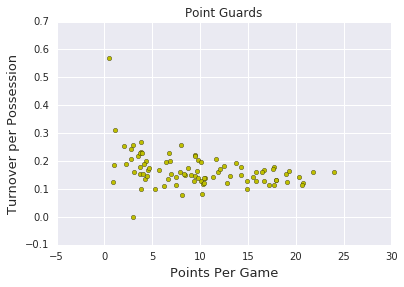

In [33]:
# select point guards from all players
point_guards = nba[nba['pos']=='PG']


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(point_guards['ppg'], point_guards['tor'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Turnover per Possession', fontsize=13)
sns.plt.show()

## K-Means Clustering
### Assigning initial cluster centers

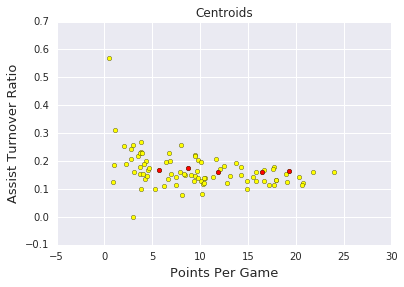

In [38]:
import numpy as np

num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.ix[random_initial_points]

# visualize centers
plt.scatter(point_guards['ppg'], point_guards['tor'], c='yellow')
plt.scatter(centroids['ppg'], centroids['tor'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
sns.plt.show()

### Store centroid coordinates in a dictionary

In [40]:
# Create a dictionary of the centroid coordinates
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['tor']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

### Write a function that calculates the euclidean distance from the centroid

In [43]:
# Write a function that calculates the euclidean distance from the centroid
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

### Step 1: Assign players to the closest cluster

In [47]:
def assign_to_cluster(row):
    lowest_distance = np.inf;
    for index, val in centroids_dict.items():
        dist = calculate_distance(val,[row['ppg'],row['tor']])
        
        if (dist<lowest_distance): 
            lowest_distance = dist
            closest_cluster = index
        
    return closest_cluster
    

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Visualize clusters

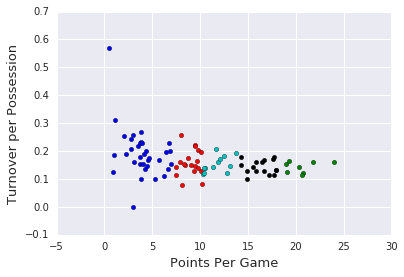

In [48]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['tor'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Turnover per Possession', fontsize=13)

visualize_clusters(point_guards, 5)

### Step 2: Recalculate centroids for updated cluster

In [49]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        pgs = df[df['cluster'] == cluster_id ]
        new_centroids_dict[cluster_id] = [np.mean(pgs['ppg']), np.mean(pgs['tor'])]
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

### Repeat assigning players to updated centroid clusters

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


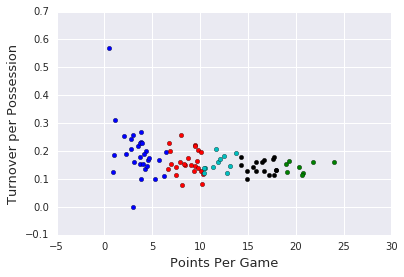

In [50]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

### Iterate steps 1-2

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


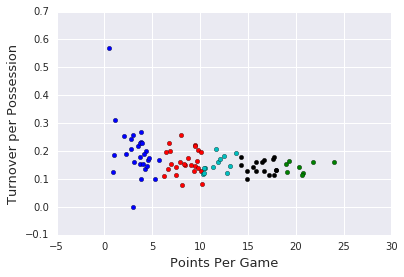

In [51]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)